In [1]:
from sklearn.datasets import (
    load_iris,
    load_digits,
    load_wine,
    load_breast_cancer,
)
import numpy as np

loaders = {
    "iris": load_iris,
    "digits": load_digits,
    "wine": load_wine,
    "breast_cancer": load_breast_cancer,
}

In [2]:
dataset = load_iris()
X, y = dataset["data"], dataset["target"]
n_classes = np.size(np.bincount(y))

In [3]:
# from jax_trees.numpy import DecisionTreeClassifier
from jax_trees.jax import DecisionTreeClassifier

# from jax_trees.jax import RandomForestClassifier
# from jax_trees.jax import GradientBoostedClassifier

model = DecisionTreeClassifier(
    n_classes=n_classes,
    max_depth=3,
    min_samples=1,
)

# model = RandomForestClassifier(
#     n_estimators=20,
#     max_depth=3,
#     min_samples=1,
# )

# model = GradientBoostedClassifier(
#     n_estimators=20,
#     learning_rate=0.1,
#     max_depth=3,
#     min_samples=1,
# )

In [4]:
fitted_model = model.fit(X, y)

In [5]:
fitted_model.score(X, y)

DeviceArray(0.97333336, dtype=float32)

In [6]:
from sklearn.model_selection import KFold
import numpy as np

cv_scores = []
for train_idx, test_idx in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    fitted_model = model.fit(X_train, y_train)
    cv_scores.append(fitted_model.score(X_test, y_test))
print(np.mean(cv_scores))

0.92666674


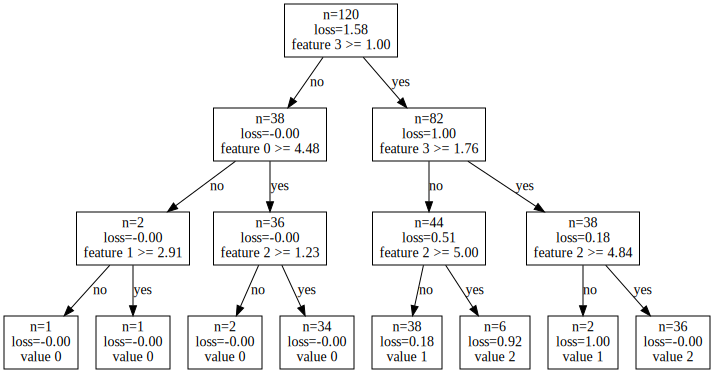

In [7]:
from graphviz import Source
from jax_trees.viz import show_nodes

Source(show_nodes(fitted_model))